## Objective
Build a machine learning model to predict/classify whether a website is phishing or legitimate based on 31 features.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [7]:
df = pd.read_csv("Phishing_Data_ final.csv")

In [8]:
# Basic Info
print("Shape:", df.shape)
print("\nSample Data:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Shape: (2456, 31)

Sample Data:
    having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                  1           1                   0                 0   
1                  0           1                   0                 0   
2                  0           0                   0                 0   
3                  0           0                   0                 0   
4                  0           0                   1                 0   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                         1             -1                 -1              -1   
1                         0             -1                  0               1   
2                         0             -1                 -1              -1   
3                         0             -1                 -1              -1   
4                         0             -1                  1               1   

   Domain_registeration_length  Fav

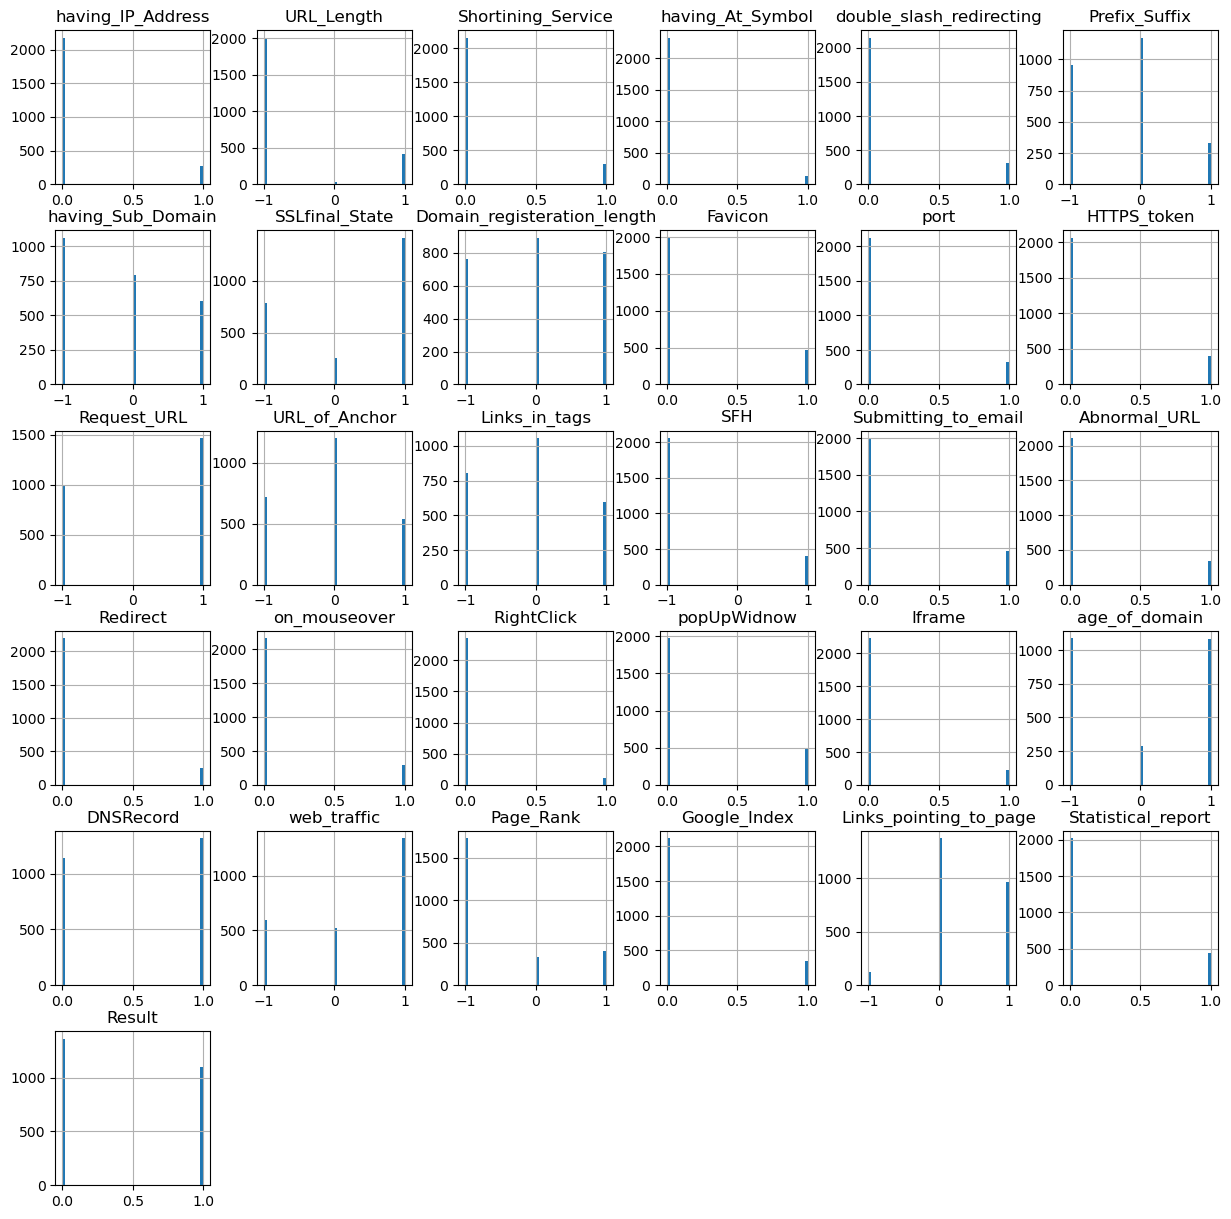

In [16]:
df.hist(bins = 50, figsize = (15,15))
plt.show()        


Target distribution:
 Result
0    1362
1    1094
Name: count, dtype: int64


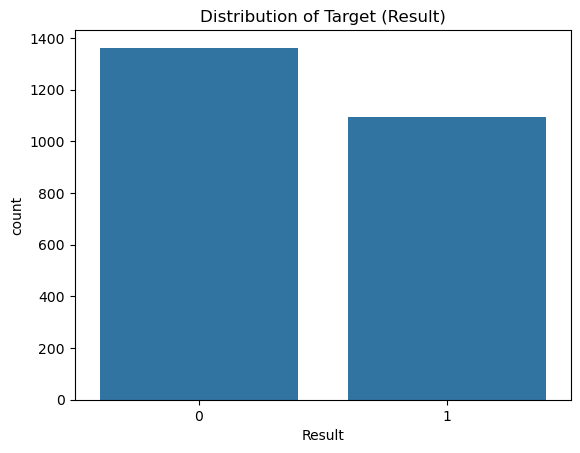

In [9]:
# Target Distribution
print("\nTarget distribution:\n", df['Result'].value_counts())
sns.countplot(x='Result', data=df)
plt.title("Distribution of Target (Result)")
plt.show()

Showed class imbalance if any, useful for strategy.

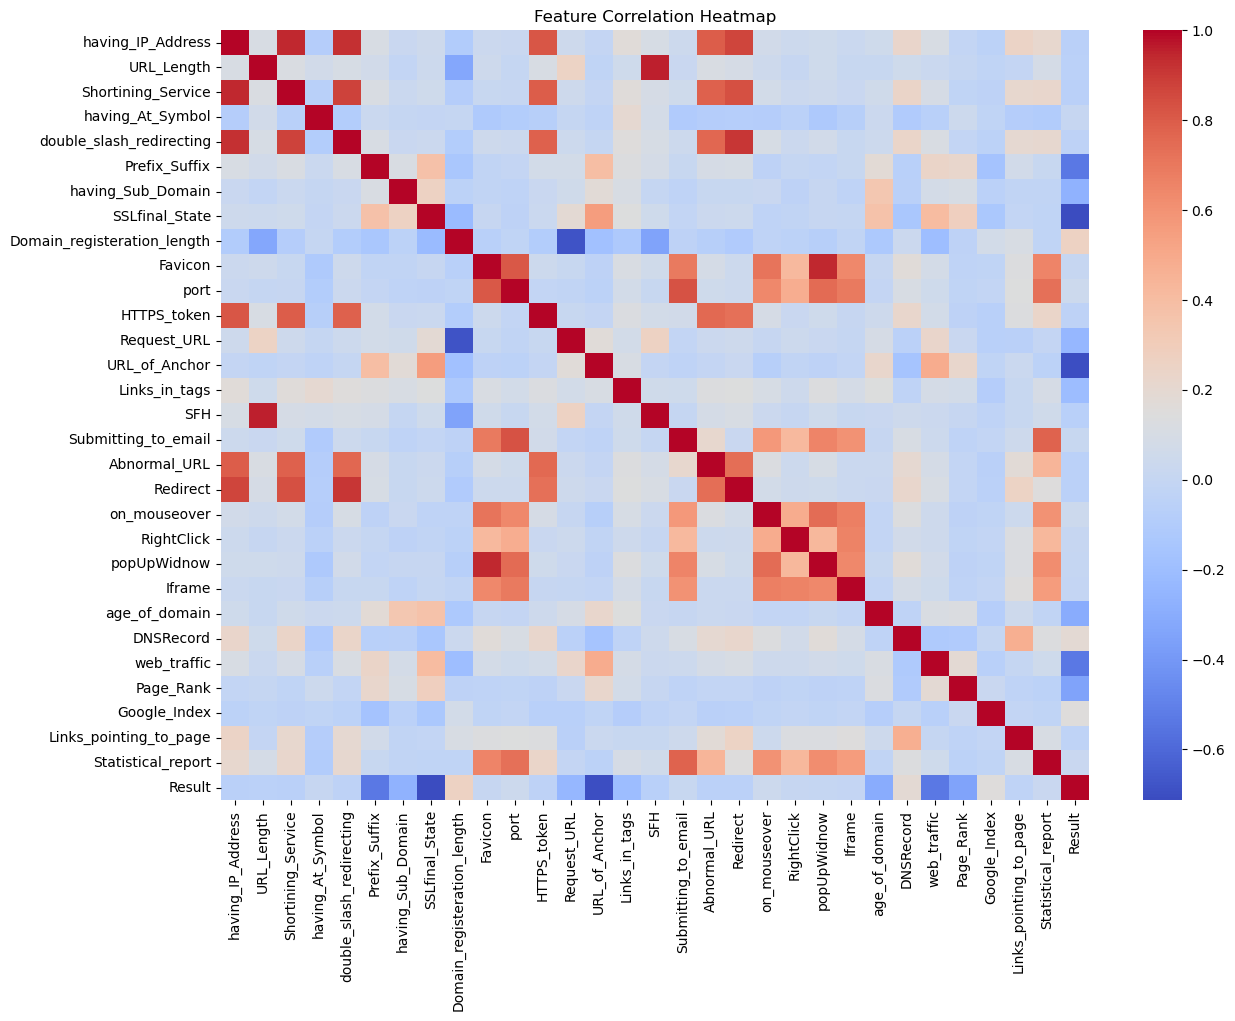

In [10]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


Helped understand the relationship between features.

In [11]:
# Features and Target
X = df.drop("Result", axis=1)
y = df["Result"]


In [12]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardized features using StandardScaler for optimal model performance.



In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Trained models using an 80/20 train-test split.

In [14]:
# Model Definitions
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

Model Training & Comparison:

* Used a variety of classifiers to compare performance:

* Logistic Regression: For baseline linear classification.

* Random Forest: Robust ensemble tree model.

* Support Vector Machine (SVM): Effective in high-dimensional spaces.

* XGBoost: High-accuracy boosting algorithm.

Evaluated using:

* Accuracy

* Classification Report (Precision, Recall, F1-Score)

* ROC-AUC Curve




📘 Logistic Regression
Accuracy: 0.9288617886178862
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.93      0.91      0.92       219

    accuracy                           0.93       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.93      0.93      0.93       492



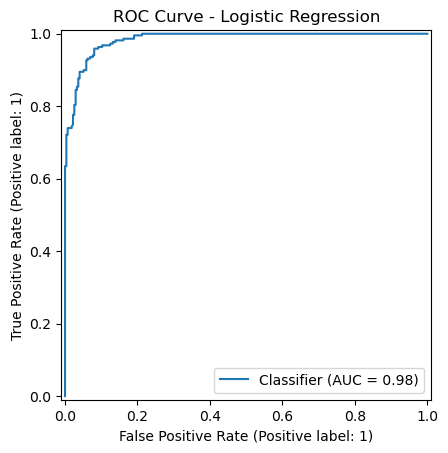


📘 Random Forest
Accuracy: 0.9695121951219512
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       273
           1       0.97      0.96      0.97       219

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492



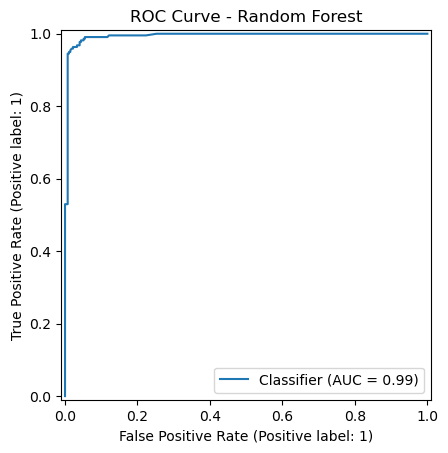


📘 SVM
Accuracy: 0.9369918699186992
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       273
           1       0.94      0.92      0.93       219

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



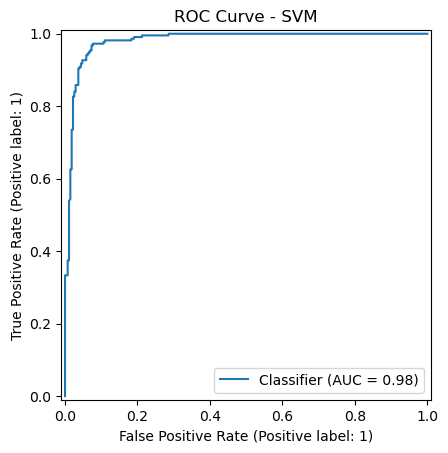


📘 XGBoost
Accuracy: 0.959349593495935
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       273
           1       0.94      0.97      0.95       219

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492



C:\Users\asus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


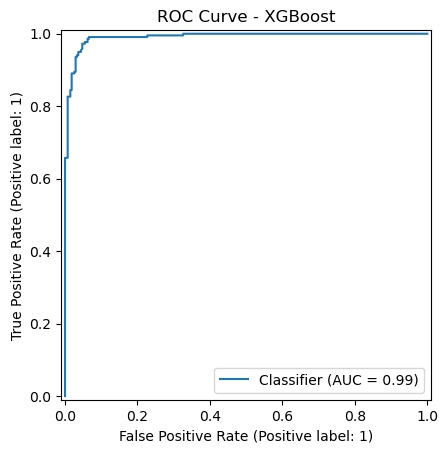

In [15]:
# Training and Evaluation
for name, model in models.items():
    print(f"\n📘 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    y_probs = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_probs)
    plt.title(f"ROC Curve - {name}")
    plt.show()

Plotted for all models to visualize trade-off between TPR and FPR

| Model               | Accuracy | AUC (approx)  | Comments                               |
| ------------------- | -------- | ------------- | -------------------------------------- |
| Logistic Regression | \~92% | Moderate      | Good baseline                          |
| Random Forest       | \~96%    | Very High          | Best PerformingModel |
| SVM                 | \~93%    | Moderate         | Good margin classifier                 |
| XGBoost             | \~95% | High | Excellent results with low overfitting                  |


* Best Model: Random Forest

* Justification: Delivered highest accuracy and AUC, while being efficient and robust to overfitting.

# Conclusion
* Random Forest model achieved the highest performance.

* The project demonstrates that ML can effectively detect phishing sites using URL-based and behavioral features.

